In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from skimage import io
from skimage.filters import gaussian
from skimage.filters import median
from skimage.filters import sobel_v
from skimage.filters import sobel_h
from skimage import feature
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import ndimage as ndi



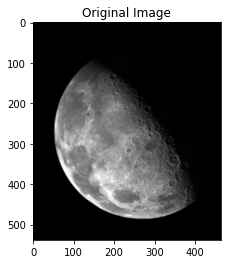

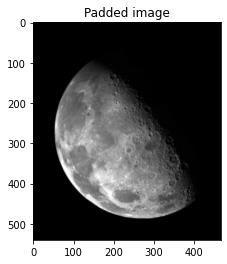

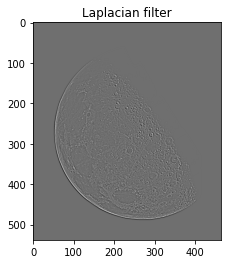

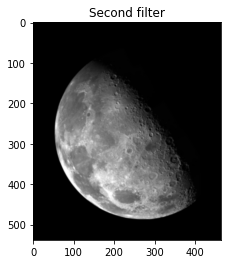

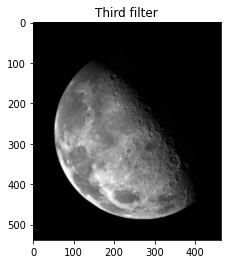

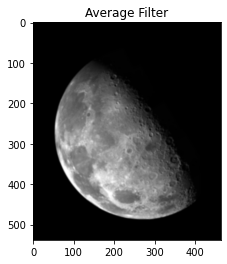

In [37]:





# Part 1

# Bugs in this part
# I met some bugs for the index and range. I sloved the bugs by carefully plotting the small matrix on a paper and clarify the indexes


# using imread function from cv2 library to read the moon image with parameter of the image
# https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
moon = cv2.imread('/content/drive/MyDrive/CS206/CS206Lab2/moon.png', 0)
# show the moon image with imshow function from matplotlib.pyplot library
plt.imshow(moon,'gray')
# set the title of the plotted image with title function from matplotlib.pyplot library and parameter the string title
plt.title('Original Image')
# show function to display a figure
plt.show()
# get height and width of the original image
H,W = moon.shape

# initialize a new padded image by extend the borders of original image size by 1 on both top and bottum, both left and right sides
padded_img = np.zeros((H+2, W+2))

# paste the initial imge in the center of the padded image
for i in range(1,H):
  for j in range(1,W):
    padded_img[i,j] = moon[i-1,j-1]
# extend the border of left and right sidea by symmetry of padded image
for i in range(H+2):
  padded_img[i,0] = padded_img[i,1]
  padded_img[i,W] = padded_img[i,W-1]
# extend the border of top and bottum sidea by symmetry of padded image 
for j in range(W+2):
  padded_img[0,j] = padded_img[1,j]
  padded_img[H,j] = padded_img[H-1,j]
# fill in the four corners of the padded image
padded_img[0,0] = moon[0,0]
padded_img[H,0] = moon[H-1,0]
padded_img[0,W] = moon[0, W-1]
padded_img[H,W] = moon[H-1, W-1]
plt.title("Padded image")
plt.imshow(padded_img,'gray')
plt.show()

# Laplacian Filter
lap_img = np.zeros((H+2,W+2))
lapfilter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
h,w = lapfilter.shape
# two outer for loops go through the padded image
# two inner for loops go through the filter matrix 
# assignment sums the dot products of every pixel of padded image to every pixel of filter matrix
for i in range(1,H-1):
  for j in range(1, W-1):
    for m in range(-1,2):
      for n in range(-1,2):
        lap_img[i,j] += padded_img[i+m,j+n]*lapfilter[m+1,n+1]

# create a new 2d numpy arrays to store the new image after striping the padding
new_lap_img = np.zeros((H,W))
for i in range(1,H-1):
  for j in range(1,W-1):
    new_lap_img[i,j] = lap_img[i,j]
# print out the new image after filtering    
plt.title("Laplacian filter")
plt.imshow(new_lap_img,'gray')
plt.show()

# Second filter
# Using the unit copy filter to copy the image
# For loops and padding striping are same as explained in first filter process
filter1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
filter1_img = np.zeros((H+2,W+2))
for i in range(1,H-1):
  for j in range(1, W-1):
    for m in range(-1,2):
      for n in range(-1,2):
        filter1_img[i,j] += padded_img[i+m,j+n]*filter1[m+1,n+1]
new_filter1_img = np.zeros((H,W))
for i in range(1,H-1):
  for j in range(1,W-1):
    new_filter1_img[i,j] = filter1_img[i,j]

plt.title("Second filter")
plt.imshow(new_filter1_img,'gray')
plt.show()


# Third Filter
# Using this shift filter to get a new image
# For loops and padding striping are same as explained in first filter process
filter2 = np.array([[0,0,0],[0,0,1],[0,0,0]])
filter2_img = np.zeros((H+2,W+2))
for i in range(1,H-1):
  for j in range(1, W-1):
    for m in range(-1,2):
      for n in range(-1,2):
        filter2_img[i,j] += padded_img[i+m,j+n]*filter2[m+1,n+1]
new_filter2_img = np.zeros((H,W))
for i in range(1,H-1):
  for j in range(1,W-1):
    new_filter2_img[i,j] = filter2_img[i,j]

plt.title("Third filter")
plt.imshow(new_filter2_img,'gray')
plt.show()


# Average filter
# For loops and padding striping are same as explained in first filter process

filter3 = np.array([[1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9]])
filter3_img = np.zeros((H+2,W+2))
for i in range(1,H-1):
  for j in range(1, W-1):   
    for m in range(-1,2):
      for n in range(-1,2):
        filter3_img[i,j] += padded_img[i+m,j+n]*filter3[m+1,n+1]
# using the formula stated in the introduction fo the assignment2
filter3_fin = padded_img + (padded_img - filter3_img)

new_filter3_img = np.zeros((H,W))
for i in range(1,H-1):
  for j in range(1,W-1):
    new_filter3_img[i,j] = filter3_img[i,j]
plt.title('Average Filter')
plt.imshow(new_filter3_img,'gray')
plt.show()





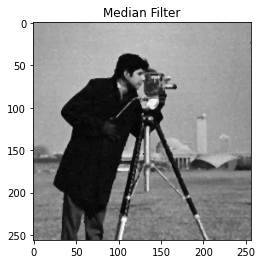

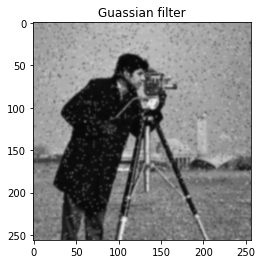

In [38]:
# part 2
# No bugs encountered in this part
noisy = cv2.imread('/content/drive/MyDrive/CS206/CS206Lab2/noisy.jpg', 0)
H,W = noisy.shape
# Apply median filter
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median
Median_img = np.zeros((H,W))
# using the median filter function from scimage library with parameter of original image
Median_img = median(noisy)
plt.imshow(Median_img,'gray')
plt.title('Median Filter')
plt.show()
# Apply gaussian filter
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian
Gaus_img = np.zeros((H,W))
# using the gaussian filter function from skimage with parameter of original image to smooth the image
Gaus_img = gaussian(noisy)
plt.imshow((255*Gaus_img).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Guassian filter")
plt.show()

# According to the output, it is obvious that the Median filter is better.
# Compared to the Gaussain filter, it is more effective in preserving edges and removing the moise
# Because it is resiliant towards the outliers which is super high or super low pixel values


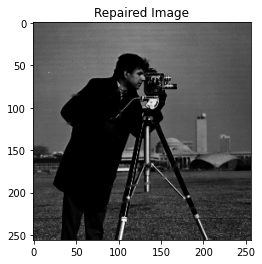

In [30]:
# part 3
# No bugs encountered in this part
# ideas and algorithms are from the lecture slides
dam_pic = cv2.imread('/content/drive/MyDrive/CS206/CS206Lab2/damage_cameraman.png', 0)
dam_mask = cv2.imread('/content/drive/MyDrive/CS206/CS206Lab2/damage_mask.png', 0)
H,W = dam_pic.shape
# Mash and damaged image have the same height and width
rep_img = np.zeros((H,W))
rep_img = dam_pic
n = 0
# The while loop set the number of iterations needed to repair the image. The iteration defines the stop criterion
# As explained and demo in the lecture by professor, i choose 50 iterations
while n <= 50:
  # gaussian function explained in last part
  rep_img = gaussian(rep_img)
  n += 1
  # two for loops to copy the good pixels from damaged image to new created rep_img under help of the mask
  for i in range(H):
    for j in range(W):
      if dam_mask[i,j] != 0:
        rep_img[i,j] = dam_pic[i,j]
plt.imshow(rep_img,'gray')
plt.title('Repaired Image')
plt.show()

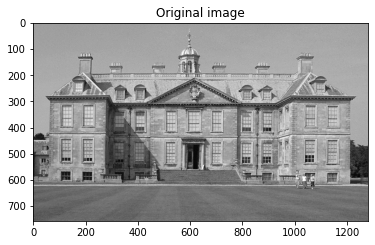

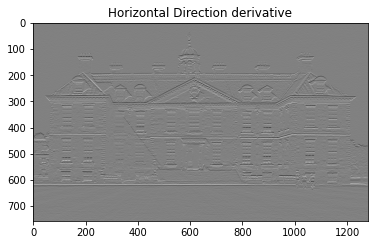

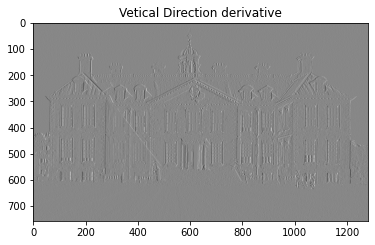

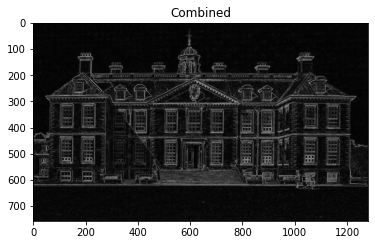

In [31]:
# part 4
# No bugs encountered in this part
# All the functions needed in this part is from introoduction of assginment2

# Display original image
ex2 = cv2.imread('/content/drive/MyDrive/CS206/CS206Lab2/ex2.jpg', 0)
plt.imshow(ex2,'gray')
plt.title('Original image')
plt.show()

# Calculate horzontal direction derivative using sobel_h function from skimage with parameter of original image
# display the horizontal direction derivatie image
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_h
Ix = sobel_h(ex2)
plt.imshow(Ix,"gray")
plt.title("Horizontal Direction derivative")
plt.show()


# Calculate vertical direction derivative using sobel_h function from skimage with parameter of original image
# display the vertical direction derivatie image
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_v

Iy = sobel_v(ex2)
plt.imshow(Iy,"gray")
plt.title("Vetical Direction derivative")
plt.show()

# Display the image after calculating the edges gradient or magnitude by sqaure root of two direction derivatives
# This is from the formula stated in lecture notes
# Also found in Edges.ipynb in forth week resources
# https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html

# parameter of sum of squre of the two direction derivative
E = np.sqrt(Ix**2 + Iy**2)
plt.imshow(E,"gray")
plt.title("Combined")
plt.show()



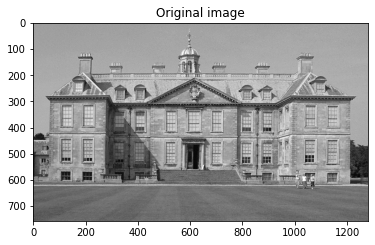

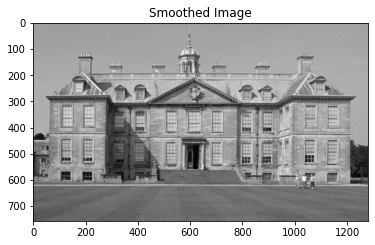

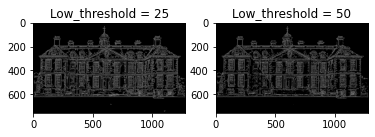

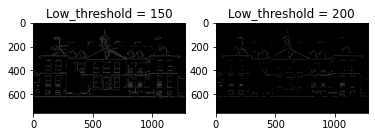

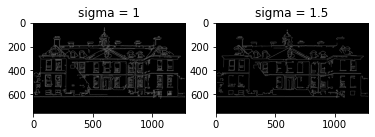

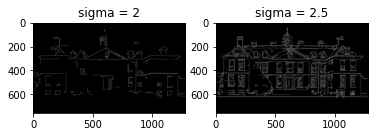

In [53]:
# Part 5

# when i use the gaussian_filter function from the scipy library, i only put the original image as the parameter and foregt to assign the sigma
# After i run the code, it warned me that 1 parameter missing
# I fixed this problem by set sigma = 1

# Citation: https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html

ex2 = dam_pic = cv2.imread('/content/drive/MyDrive/CS206/CS206Lab2/ex2.jpg', 0)
plt.imshow(ex2,'gray')
plt.title('Original image')
plt.show()

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html#scipy.ndimage.gaussian_filter
# ndimage.gaussian_filte function from scipy library takes input/parameters of original image and a sigma value
Gaus_img = ndi.gaussian_filter(ex2, 1)
plt.imshow(Gaus_img,'gray')
plt.title('Smoothed Image')
plt.show()

# feature.cannay function takes mainly 3 parameters as introduced in lecture by professors: the gaussian filtered image, sigma, threshold 
# In this case, set sigma = 1 and low threshold = 25
edges1 = feature.canny(Gaus_img, sigma = 1, low_threshold = 25)
# set the layout to be one row with two images shwoing and show edges1 at the (1,1) position
# subplot function from matplotlib.pyplot library with first parameter as number of rows and 
# second parameter as number of columns and third parameter as position/order the image should be displayed at
# https://www.geeksforgeeks.org/matplotlib-pyplot-subplot-function-in-python/
plt.subplot(1,2,1)
plt.title("Low_threshold = 25")
plt.imshow(edges1,'gray')


# set sigma = 1 and low threshold = 50
edges2 = feature.canny(Gaus_img, sigma = 1, low_threshold = 50)
plt.subplot(1,2,2)
plt.title("Low_threshold = 50")
plt.imshow(edges2,'gray')
plt.show()

# set sigma = 1 and low threshold = 150
edges3 = feature.canny(Gaus_img, sigma = 1, low_threshold = 150)
plt.subplot(1,2,1)
plt.title("Low_threshold = 150")
plt.imshow(edges3,'gray')

# set sigma = 1 and low threshold = 200
edges4 = feature.canny(Gaus_img, sigma = 1, low_threshold = 200)
plt.subplot(1,2,2)
plt.title("Low_threshold = 200")
plt.imshow(edges4,'gray')
plt.show()

# sigma = 1, low_threshold = 50, high_threshold = 150
edges5 = feature.canny(Gaus_img, sigma = 1, low_threshold = 50, high_threshold = 150)
plt.subplot(1,2,1)
plt.title("sigma = 1")
plt.imshow(edges5,'gray')


# sigma = 1.5, low_threshold = 50, high_threshold = 150
edges6 = feature.canny(Gaus_img, sigma = 1.5, low_threshold = 50, high_threshold = 150)
plt.subplot(1,2,2)
plt.title("sigma = 1.5")
plt.imshow(edges6,'gray')
plt.show()


# sigma = 2, low_threshold = 50, high_threshold = 150
edges7 = feature.canny(Gaus_img, sigma = 2, low_threshold = 50, high_threshold = 150)
plt.subplot(1,2,1)
plt.title("sigma = 2")
plt.imshow(edges7,'gray')



# sigma = 2.5, low_threshold = 50, high_threshold = 150
edges8 = feature.canny(Gaus_img, sigma = 2.5, low_threshold = 50, high_threshold = 150)
plt.subplot(1,2,2)
plt.title("sigma = 2.5")
plt.imshow(edges5,'gray')
plt.show()


# Threshold is kind of criterion. The lower the threshold is, the more noise there should be
# The higher the threshold is, the less the important edges are preserved

# sigma is kind of zoom out as introduced in the lecture by professor. Therefore, the smaller the sigma is, the clearer the edges should be
# As the output images showed, this statement is proved








